In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2634 sha256=4a2e22f05d13afbf430f1b685ea5f853435eb37356ca6c57025d6bba3444cae5
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints


# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub



import re
import nltk
from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

#Metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [ ]:
from google.colab import drive
USE_GOOGLE_DRIVE = True
if USE_GOOGLE_DRIVE:
    drive.mount('/content/drive')
    PATH_PREFIX = 'drive/My Drive/ABSA'
else:
    PATH_PREFIX = '..'

train_data=os.path.join(
    PATH_PREFIX, 'Laptop_Train_v2.xml'
)
test_data=os.path.join(
    PATH_PREFIX, 'Laptops_Test_Gold.xml'
)
train_lap_new = os.path.join(
    PATH_PREFIX,'Laptop_Train_v2.csv'
)
train_rest_new = os.path.join(
    PATH_PREFIX,'Restaurants_Train_v2.csv'
)
train_rest = os.path.join(
    PATH_PREFIX,'Restaurants_Train_v2.xml'
)


Mounted at /content/drive


Load the Restaurant Dataset and the the Laptop Dataset

In [ ]:
restaurant_df = pd.read_csv(train_rest_new, encoding='utf8')

In [ ]:
laptop_df = pd.read_csv(train_lap_new, encoding='utf8')

In [ ]:


restaurant_df



,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
3688,671,Each table has a pot of boiling water sunken i...,pot of boiling water,neutral,17,37
3689,671,Each table has a pot of boiling water sunken i...,meats,neutral,99,104
3690,671,Each table has a pot of boiling water sunken i...,vegetables,neutral,114,124
3691,671,Each table has a pot of boiling water sunken i...,rice,neutral,130,134


In [ ]:
laptop_df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


In [ ]:


df = restaurant_df.append(laptop_df, ignore_index=True)



<ipython-input-23-5d1884ba6b98>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = restaurant_df.append(laptop_df, ignore_index=True)


In [ ]:
#display the dataset
df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
6046,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,neutral,104,134
6047,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,neutral,140,170
6048,848,"How Toshiba handles the repair seems to vary, ...",repair,conflict,24,30
6049,848,"How Toshiba handles the repair seems to vary, ...",repair,positive,130,136


In [ ]:
from wordcloud import WordCloud
wordcloud2 = WordCloud().generate(' '.join(df['Sentence'])),


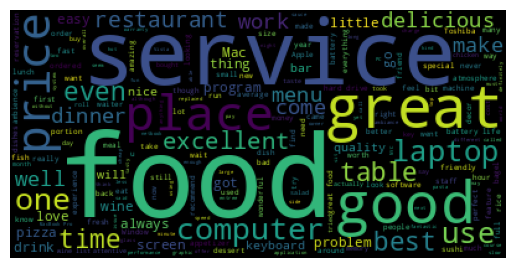

In [ ]:
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
## display the columns of the dataframe
df.columns

Index(['id', 'Sentence', 'Aspect Term', 'polarity', 'from', 'to'], dtype='object')

In [ ]:
## display the null values in the polarity column
df['polarity'].isna().sum()

0

In [ ]:
## change the labels to integers for the training phase
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2

<ipython-input-29-378d21b94d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'negative'] = 0
<ipython-input-29-378d21b94d4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'positive'] = 1
<ipython-input-29-378d21b94d4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'neutral'] = 2


In [ ]:
df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,0,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,1,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,1,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,1,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,2,141,145


In [ ]:
#Delete the useless columns
train_df = df.drop(['id','from','to'], axis = 1)

In [ ]:


Aspects_term = train_df['polarity'].unique()




In [ ]:
Aspects_term[:20]

array([0, 1, 2, 'conflict'], dtype=object)

In [ ]:


train_df.head()



,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


In [ ]:


train_df[train_df.polarity == 'conflict']



,Sentence,Aspect Term,polarity
64,The food was delicious but do not come here on...,food,conflict
101,The service varys from day to day- sometimes t...,service,conflict
133,Though the Spider Roll may look like a challen...,Spider Roll,conflict
142,"An oasis of refinement: Food, though somewhat...",Food,conflict
172,"Food is usually very good, though ocasionally ...",Food,conflict
...,...,...,...
5372,"It had a seventeen inch screen which I wanted,...",seventeen inch screen,conflict
5409,While lacking some of the functions of the oth...,functions,conflict
5547,"Speakers don't get that loud, but good enough.",Speakers,conflict
5552,"Screen is crystal clear, yes it's small - but ...",Screen,conflict


In [ ]:
# Delete the polarity than contains CONFLICT, Means that the sentence contains more than one sentiment when it comes to the aspect term
train_df.drop(train_df[train_df.polarity == 'conflict'].index, inplace = True)

In [ ]:


# our new Dataframe
train_df



,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2
...,...,...,...
6045,We also use Paralles so we can run virtual mac...,Windows 7 Home Premium,2
6046,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2
6047,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2
6049,"How Toshiba handles the repair seems to vary, ...",repair,1


In [ ]:
#Training data shape
df.shape



(6051, 6)

<Axes: >

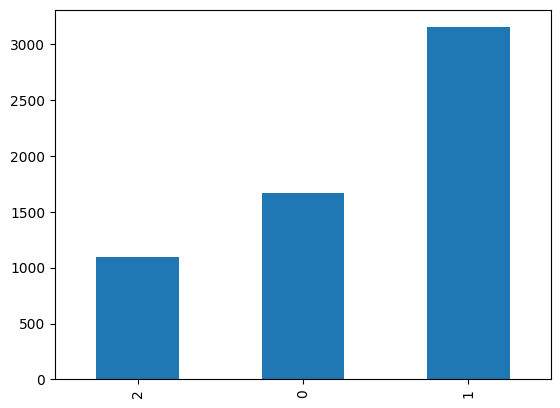

In [ ]:
# Polarities distribution in our dataset
train_df.polarity.value_counts().sort_values().plot(kind = 'bar')



In [ ]:
# Convert polarity Values to Integers
train_df["polarity"] = pd.to_numeric(train_df["polarity"],errors='coerce')



# Display our training Dataframe
train_df.head()



,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


In [ ]:
# drop the NAN Values from the dataframe
train_df.dropna(subset = ['polarity'], inplace = True)



# Verify if the dataframe contains any NAN Values
train_df.isna().sum()



Sentence       0
Aspect Term    0
polarity       0
dtype: int64

In [ ]:
#Split the Dataset into Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['polarity'],stratify=train_df['polarity'], test_size=0.2, random_state=1)



In [ ]:
# the size of the training dataset
X_train.Sentence.size

4732

In [ ]:


# Display the shape of the target values
y_train.shape



(4732,)

In [ ]:
NUM_WORDS = 100000 ## MAx of words to keep, based on word frequency.
EMBEDDING_SIZE = 128 ## the length of the Vector

In [ ]:
# Embedding code
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, )
# Fit_on_texts : Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(list(X_train.Sentence))
text_X_train_tokenized = tokenizer.texts_to_sequences(X_train.Sentence) # list of tokenized sentences
Aspect_X_train_tokenized = tokenizer.texts_to_sequences(X_train['Aspect Term']) # list of tokenized sentences
text_X_test_tokenized = tokenizer.texts_to_sequences(X_test.Sentence) # list of tokenized sentences
Aspect_X_test_tokenized = tokenizer.texts_to_sequences(X_test['Aspect Term']) # list of tokenized sentences

In [ ]:
#Maximum length of sentences
Max_Len =  max([len(one_title) for one_title in text_X_train_tokenized])
Max_Len

77

In [ ]:
#Pads sequences(or sentences) to the same length.


text_X_train_padded = pad_sequences(text_X_train_tokenized, maxlen=Max_Len)
aspect_X_train_padded = pad_sequences(Aspect_X_train_tokenized, maxlen=1)

text_X_test_padded = pad_sequences(text_X_test_tokenized, maxlen=Max_Len)
aspect_X_test_padded = pad_sequences(Aspect_X_test_tokenized, maxlen=1)

In [ ]:
# the embedding presentation of the aspects
aspect_X_train_padded[0]

# the embedding presentation of the sentences
text_X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 168,  63,   1,  77, 262,  19, 263,  26, 269,  30,  35],
      dtype=int32)

In [ ]:
# Concatenate the Embedding presentation of the sentences and aspects to create training and testing dataset
train_data =  [text_X_train_padded,aspect_X_train_padded]
test_data =   [text_X_test_padded,aspect_X_test_padded]

In [ ]:
test_data[1][0]



array([728], dtype=int32)

In [ ]:
# Attention Mechanism
# modified based on `https://gist.github.com/cbaziotis/7ef97ccf71cbc14366835198c09809d2`
class Attention(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
 e: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None, W_constraint=None,
                 u_constraint=None, b_constraint=None, use_W=True, use_bias=False, return_self_attend=False,
                 return_attend_weight=True, **kwargs):
        self.supports_masking = True

        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.use_W = use_W
        self.use_bias = use_bias
        self.return_self_attend = return_self_attend    # whether perform self attention and return it
        self.return_attend_weight = return_attend_weight    # whether return attention weight
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        if self.use_W:
            self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),  initializer=self.init,
                                     name='{}_W'.format(self.name), regularizer=self.W_regularizer,
                                     constraint=self.W_constraint)
        if self.use_bias:
            self.b = self.add_weight(shape=(input_shape[1],), initializer='zero', name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer, constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],), initializer=self.init, name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer, constraint=self.u_constraint)

        super(Attention, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        if self.use_W:
            x = K.tanh(K.dot(x, self.W))

        ait = Attention.dot_product(x, self.u)
        if self.use_bias:
            ait += self.b

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        if self.return_self_attend:
            attend_output = K.sum(x * K.expand_dims(a), axis=1)
            if self.return_attend_weight:
                return [attend_output, a]
            else:
                return attend_output
        else:
            return a

    def compute_output_shape(self, input_shape):
        if self.return_self_attend:
            if self.return_attend_weight:
                return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[1])]
            else:
                return input_shape[0], input_shape[-1]
        else:
            return input_shape[0], input_shape[1]

    @staticmethod
    def dot_product(x, kernel):
        """
        Wrapper for dot product operation, in order to be compatible with both
        Theano and Tensorflow
        Args:
            x (): input
            kernel (): weights
        Returns:
        """
        if K.backend() == 'tensorflow':
            return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
        else:
            return K.dot(x, kernel)

In [ ]:
#LSTM with Aspect Embedding

def ae_lstm(lstm_units = 512):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    aspect_embed = asp_embedding(input_aspect)


    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden = LSTM(lstm_units)(input_concat)
    Dense_layer  = Dense(128, activation='relu')(hidden)
    output_layer = Dense(3, activation='softmax')(Dense_layer)
    return Model([input_text, input_aspect], output_layer)

In [ ]:
ae_lstm_model = ae_lstm()
ae_lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 128)       12800000    ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 77, 128)      12800000    ['input_1[0][0]']                
                                                                                              

In [ ]:
y_train.size



4732

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

ae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history =  ae_lstm_model.fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=16, epochs=20, callbacks = [learning_rate_reduction])

Epoch 1/20
296/296 [==============================] - 531s 2s/step - loss: 1.0070 - accuracy: 0.5456 - val_loss: 0.8961 - val_accuracy: 0.5765 - lr: 0.0100
Epoch 2/20
296/296 [==============================] - 505s 2s/step - loss: 0.7491 - accuracy: 0.6781 - val_loss: 0.8686 - val_accuracy: 0.6340 - lr: 0.0100
Epoch 3/20
296/296 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.7162
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
296/296 [==============================] - 499s 2s/step - loss: 0.6555 - accuracy: 0.7162 - val_loss: 0.8681 - val_accuracy: 0.6213 - lr: 0.0100
Epoch 4/20
296/296 [==============================] - 508s 2s/step - loss: 0.5514 - accuracy: 0.7555 - val_loss: 0.8301 - val_accuracy: 0.6593 - lr: 1.0000e-03
Epoch 5/20
296/296 [==============================] - 494s 2s/step - loss: 0.5052 - accuracy: 0.7658 - val_loss: 0.8514 - val_accuracy: 0.6619 - lr: 1.0000e-03
Epoch 6/20
296/296 [==============================]

In [ ]:
text_X_test_padded[6].shape



(77,)

In [ ]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
print(val_data[0].shape)
ae_lstm_model.predict(val_data)

(1, 77)
1/1 [==============================] - 1s 642ms/step


array([[0.54179054, 0.09655492, 0.3616546 ]], dtype=float32)

In [ ]:


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



In [ ]:
print("Evaluate on test data")
results = ae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
37/37 [==============================] - 11s 297ms/step - loss: 0.9254 - accuracy: 0.6551
test loss, test acc: [0.9254444241523743, 0.6551141142845154]
Accuracy of the model is -  65.51141142845154 %


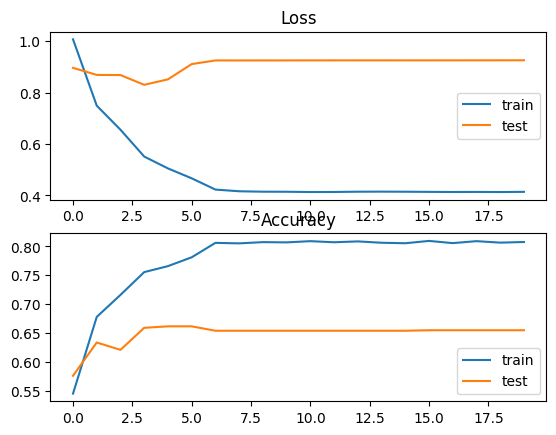

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [65]:
#Attention-based LSTM (AT-LSTM)

def at_lstm(lstm_units = 512):
        input_text = Input(shape=(Max_Len,))
        input_aspect = Input(shape=(1,),)

        word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

        asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence
        hidden_vecs = LSTM(lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask
        print(concat.shape)
         # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        Dense_layer  = Dense(128, activation='relu')(attend_hidden)
        output_layer = Dense(3, activation='softmax')(Dense_layer)
        return Model([input_text, input_aspect], output_layer)

In [66]:
at_lstm_model =  at_lstm()
at_lstm_model.summary()

(None, 77, 640)


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 77, 128)      12800000    ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 128)       12800000    ['input_4[0][0]']                
                                                                                            

In [71]:
# model training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
opt = keras.optimizers.Adam(learning_rate=0.01)

at_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
at_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=10, callbacks = [learning_rate_reduction])

Epoch 1/10
148/148 [==============================] - 305s 2s/step - loss: 1.1925 - accuracy: 0.4918 - val_loss: 1.0584 - val_accuracy: 0.3271 - lr: 0.0100
Epoch 2/10
148/148 [==============================] - 284s 2s/step - loss: 1.0083 - accuracy: 0.5321 - val_loss: 0.9680 - val_accuracy: 0.5402 - lr: 0.0100
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.9251 - accuracy: 0.5708
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
148/148 [==============================] - 284s 2s/step - loss: 0.9251 - accuracy: 0.5708 - val_loss: 0.9616 - val_accuracy: 0.5173 - lr: 0.0100
Epoch 4/10
148/148 [==============================] - 296s 2s/step - loss: 0.8760 - accuracy: 0.5932 - val_loss: 0.9570 - val_accuracy: 0.5587 - lr: 1.0000e-03
Epoch 5/10
148/148 [==============================] - 287s 2s/step - loss: 0.8373 - accuracy: 0.6190 - val_loss: 0.9514 - val_accuracy: 0.5647 - lr: 1.0000e-03
Epoch 6/10
148/148 [==============================]

In [72]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
at_lstm_model.predict(val_data)

1/1 [==============================] - 1s 615ms/step


array([[0.44009367, 0.23571292, 0.32419342]], dtype=float32)

In [73]:
print("Evaluate on test data")
results = at_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
37/37 [==============================] - 10s 259ms/step - loss: 0.9560 - accuracy: 0.5503
test loss, test acc: [0.9560254812240601, 0.5502958297729492]
Accuracy of the model is -  55.02958297729492 %


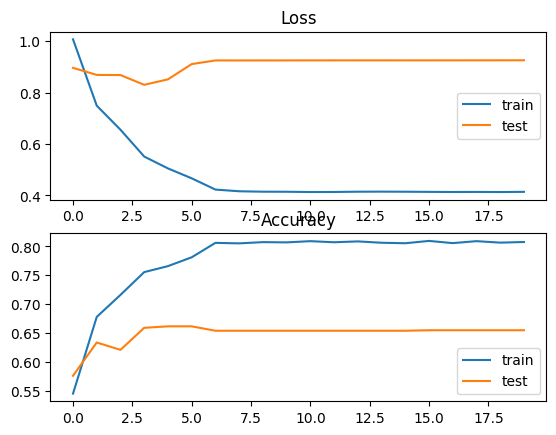

In [74]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [67]:
# attention-based lstm with aspect embedding
def atae_lstm(lstm_units = 128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    print(input_concat.shape)
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    last_hidden_dense = Dense(lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)

In [68]:

atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()



(None, 77, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 128)       12800000    ['input_6[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 77, 128)      12800000    ['input_5[0][0]']                
                                                                            

In [69]:
#Model Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=20, callbacks = [learning_rate_reduction])

Epoch 1/20
148/148 [==============================] - 132s 843ms/step - loss: 1.1399 - accuracy: 0.5530 - val_loss: 0.8857 - val_accuracy: 0.6188 - lr: 0.0010
Epoch 2/20
148/148 [==============================] - 117s 792ms/step - loss: 0.7896 - accuracy: 0.7295 - val_loss: 1.3696 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 3/20
148/148 [==============================] - 120s 814ms/step - loss: 0.6918 - accuracy: 0.8297 - val_loss: 1.6918 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 4/20
148/148 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.8580
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
148/148 [==============================] - 118s 797ms/step - loss: 0.5889 - accuracy: 0.8580 - val_loss: 2.3777 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 5/20
148/148 [==============================] - ETA: 0s - loss: 0.4993 - accuracy: 0.9053
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
148/148 [====================

In [70]:
#Model Evaluation
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
37/37 [==============================] - 2s 57ms/step - loss: 2.5414 - accuracy: 0.6957
test loss, test acc: [2.541419267654419, 0.6956889033317566]
Accuracy of the model is -  69.56889033317566 %


Reference: The code is executed by taking reference from - https://www.kaggle.com/datasets/charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis?resource=download&select=Restaurants_Train_v2.xml
